In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 한글화

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
import warnings
warnings.filterwarnings(action='ignore') 

In [4]:
df = pd.read_csv('./ml_source_files/house_price.csv')

In [5]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [245]:
# nan값의 수 기준 상위 5개의 칼럼을 삭제
# 나머지 칼럼의 칼럼값의 평균값으로 nan값을 채우시오

In [6]:
drop_idx = df.isna().sum().sort_values(ascending=False)[:5].index

In [7]:
df.drop(drop_idx, axis=1, inplace=True)

In [10]:
df.fillna(df.mean(axis=1), inplace=True)

In [11]:
df.drop('Id', axis=1, inplace=True)

In [12]:
df.isna().sum().sort_values()

MSSubClass        0
SaleCondition     0
HeatingQC         0
CentralAir        0
1stFlrSF          0
                 ..
BsmtFinType2     38
GarageQual       81
GarageCond       81
GarageFinish     81
GarageType       81
Length: 75, dtype: int64

In [251]:
col_dtypes = df.dtypes == 'object'
df[col_dtypes[col_dtypes].index].isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [252]:
# df에서 문자열 칼럼을 numerictype로 모두 바꾸시오

In [253]:
df[col_dtypes[col_dtypes].index].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [13]:
df_one = pd.get_dummies(df)

In [14]:
df_one.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(234)
memory usage: 755.8 KB


In [16]:
(df_one.dtypes == 'object').sum()

0

In [17]:
df_one.isnull().sum().sum()

0

In [18]:
df_one.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [19]:
# LinearRegression 모델을 생성하고 평가하기 (LinearRegression, Ridge, Lasso)

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
x = df_one.drop('SalePrice', axis=1)
y = df_one.SalePrice

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [23]:
lr = LinearRegression()
rid = Ridge(alpha=1)
las = Lasso(alpha=0.001)

lr.fit(x_train, y_train)
rid.fit(x_train, y_train)
las.fit(x_train, y_train)

preds_lr = lr.predict(x_test)
preds_rid = rid.predict(x_test)
preds_las = las.predict(x_test)

print('r2_score_lr :', r2_score(y_test, preds_lr), 'r2_score_rid :', r2_score(y_test, preds_rid),
      'r2_score_las :', r2_score(y_test, preds_las))

r2_score_lr : 0.8683053138889925 r2_score_rid : 0.8634816683488853 r2_score_las : 0.8797295175570584


In [25]:
models = [lr,rid,las]

In [26]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

In [27]:
for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    accuracy = m.score(x_test,y_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print('='*50)
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)

LinearRegression
accuracy : 0.8683053138889925
rmse : 31901.826646114525
Ridge
accuracy : 0.8634816683488853
rmse : 32480.81449334144
Lasso
accuracy : 0.8797295175570584
rmse : 30486.737511573414


In [268]:
# scale를 조정한 후 linear model로 예측하고 모델을 평가

In [28]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

In [32]:
models = [lr,rid,las,xgb_reg,lgbm_reg]

In [48]:
for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    accuracy = m.score(x_test_scaled,y_test)
#     r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print('='*50)
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
#     print('r2_score :', r2)
    print('rmse :', rmse)

LinearRegression
accuracy : -1.0845137530277396e+22
rmse : 9154802022802194.0
Ridge
accuracy : 0.8782647767422347
rmse : 30671.820454534467
Lasso
accuracy : 0.8791838049272815
rmse : 30555.824156819283
XGBRegressor
accuracy : 0.8358944096815899
rmse : 35611.73335078527
LGBMRegressor
accuracy : 0.8632627733371069
rmse : 32506.844113134022


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

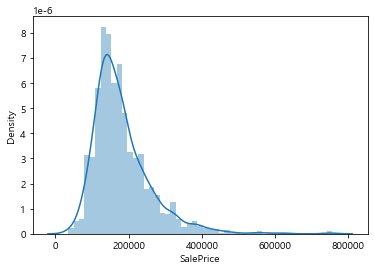

In [34]:
sns.distplot(y)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

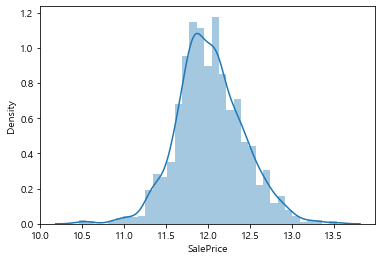

In [35]:
sns.distplot(np.log1p(y))

In [49]:
y_log = np.log1p(y)
# log1p(n) = log(n+1) : 값이 0일때 error를 해결하기 위해
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [56]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

for m in models:
    if m.__class__.__name__ == 'LinearRegression':
        continue
    m.fit(x_train_scaled, y_train_log)
    preds_log = m.predict(x_test_scaled)
    preds_exp = np.expm1(preds_log)
#     accuracy = m.score(x_test_scaled,y_test_log)
#     r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test_log,preds_exp))
    
    print('='*50)
    print(m.__class__.__name__)
#     print('accuracy :', accuracy)
#     print('r2_score :', r2)
    print('rmse :', rmse)

Ridge
rmse : 200850.14558612314
Lasso
rmse : 166435.82871721024
XGBRegressor
rmse : 191545.8808621234
LGBMRegressor
rmse : 193637.83744310643


In [38]:
# GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
rid_params = {'alpha' : [20, 50, 100, 200, 300, 500, 700, 1000]}
las_params = {'alpha' : [0.0001, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1.5, 10]}

In [59]:
rid = Ridge()
las = Lasso()
grid = GridSearchCV(rid, param_grid=rid_params, refit=True, verbose=True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [20, 50, 100, 200, 300, 500, 700, 1000]},
             verbose=True)

In [60]:
grid.best_params_

{'alpha': 500}

In [61]:
grid.best_score_

0.8351580968510873

In [62]:
grid = GridSearchCV(las, param_grid=las_params, refit=True, verbose=True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1,
                                   0.5, 1.5, 10]},
             verbose=True)

In [63]:
grid.best_params_

{'alpha': 10}

In [64]:
grid.best_score_

0.7903867116689045

In [65]:
rid = Ridge(alpha=90)
rid.fit(x_train_scaled, y_train)
rid.score(x_test_scaled, y_test)

0.879456489976275

In [66]:
y = df.SalePrice
x = df.drop('SalePrice', axis=1)

In [67]:
x_one = pd.get_dummies(x)

In [68]:
scaler = MinMaxScaler()

In [69]:
x_one_scaled = scaler.fit_transform(x_one)

In [70]:
x_one_scaled = pd.DataFrame(x_one_scaled, columns = x_one.columns)
x_one_scaled.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_one_scaled, y, test_size=0.2, random_state=111)

In [72]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()
train_models = []

for m in models:
    m.fit(x_train, y_train)
    train_models.append(m)
    preds = m.predict(x_test)
    accuracy = m.score(x_test,y_test)
#     r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print('='*50)
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
#     print('r2_score :', r2)
    print('rmse :', rmse)

LinearRegression
accuracy : -2.7703871088769994e+20
rmse : 1421712868053092.0
Ridge
accuracy : 0.8614751175904265
rmse : 31791.10039298783
Lasso
accuracy : 0.8865666586091254
rmse : 28768.156195405558
XGBRegressor
accuracy : 0.8333579858131749
rmse : 34868.55247531038
LGBMRegressor
accuracy : 0.8699309375184681
rmse : 30805.528956623457


In [73]:
train_models

[LinearRegression(),
 Ridge(),
 Lasso(),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None),
 LGBMRegressor()]

In [74]:
feat_imp = pd.Series(train_models[0].coef_, index = x_one_scaled.columns).sort_values(ascending=False)
feat_imp.head()

BsmtCond_Po     3.451366e+16
BsmtCond_Fa     3.451366e+16
BsmtCond_TA     3.451366e+16
BsmtCond_Gd     3.451366e+16
PavedDrive_N    2.834763e+16
dtype: float64

<AxesSubplot:>

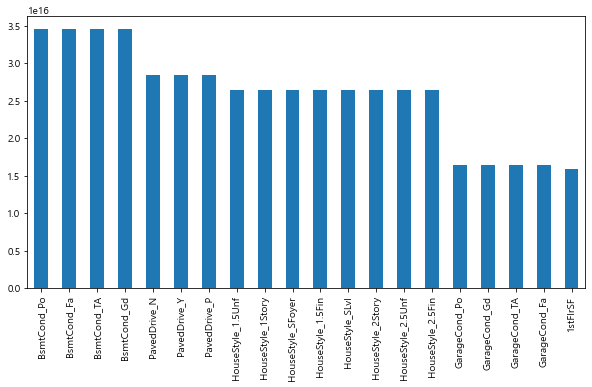

In [75]:
feat_imp.head(20).plot(kind='bar', figsize=(10,5))

In [79]:
feat_imp = pd.Series(train_models[0].coef_, index = x_one_scaled.columns).sort_values()
feat_imp.head()

BldgType_Twnhs    -8.727199e+16
BldgType_TwnhsE   -8.727199e+16
BldgType_Duplex   -8.727199e+16
BldgType_2fmCon   -8.727199e+16
BldgType_1Fam     -8.727199e+16
dtype: float64

<AxesSubplot:>

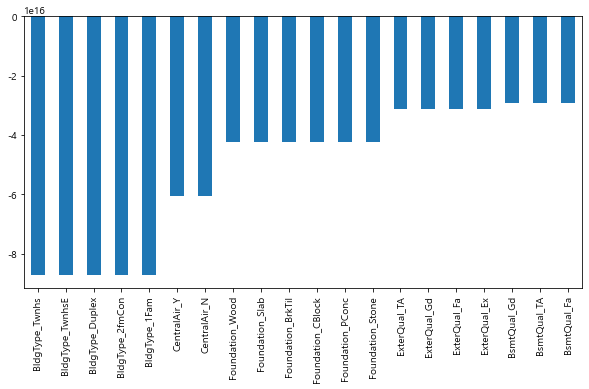

In [80]:
feat_imp.head(20).plot(kind='bar', figsize=(10,5))